## Networkx

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

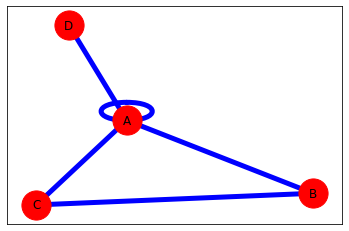

In [12]:
G=nx.Graph()
G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("A","B")
G.add_edge("C","B")
G.add_edge("A","C")
G.add_edge("A","D")
G.add_edge("A","A")

nx.draw_networkx(G,node_size=850, node_color='red', width=5, edge_color='blue')
plt.show()

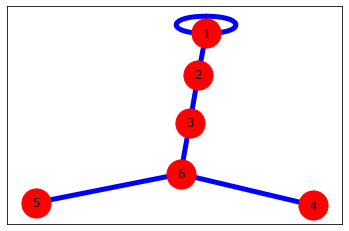

In [14]:
G=nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(1,1),(2,3),(3,6),(4,6),(5,6)])
nx.draw_networkx(G,node_size=850, node_color='red', width=5, edge_color='blue')
plt.show()

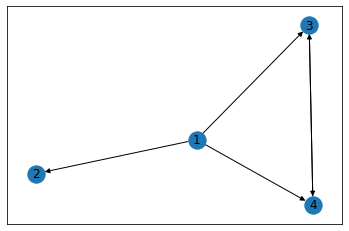

In [17]:
G=nx.DiGraph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(1,3),(1,4),(3,4),(4,3)])
nx.draw_networkx(G)
plt.show()

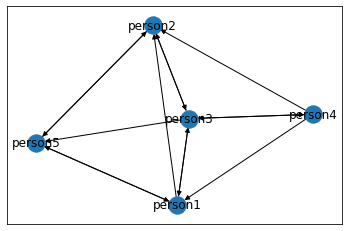

In [22]:
# following dict shows u how 5 people follows each other on Insta
# create a directed nextworkx graph

instagram = {
    'person1': [0,1,1,0,1], 
    'person2': [0,0,1,0,1], 
    'person3': [1,1,0,1,1],
    'person4': [1,1,1,0,0], 
    'person5': [1,1,0,0,0]
}

G=nx.DiGraph()
G.add_nodes_from(instagram.keys())

for person in instagram.keys():
    for conn in range(len(instagram[person])):
        if instagram[person][conn] == 1:
            G.add_edge(person,f'person{(conn+1)}')

nx.draw_networkx(G)
plt.show()

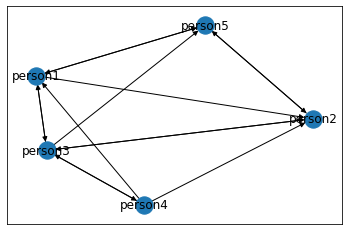

In [35]:
G=nx.DiGraph(np.array(list(instagram.values())))
nx.draw_networkx(G,labels={0:'person1',1:'person2',2:'person3',3:'person4',4:'person5'})
plt.show()

## Folium

In [4]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium

In [64]:
map1 = folium.Map(location=[22.9912, 72.4884], zoom_start=12, tiles='OpenStreetMap') # max zoom = 20
map1

In [66]:
map1 = folium.Map(location=[22.9912, 72.4884], zoom_start=12, tiles='OpenStreetMap') # max zoom = 20


# marker
folium.Marker(
    location=[23.2152, 72.6682],
    tooltip='This is parking location', 
    popup=folium.Popup("""<h2>Station1</h2><br/>
    <a href='https://www.ljku.edu.in'>Click Here</a>""", max_width=500),
    icon=folium.Icon(color="red", icon="info")
).add_to(map1) # radius is in meters

# radius
folium.Circle(
    location=[23.2152, 72.6682], 
    radius=10000,
    fill_color="#f03", 
    fill=True, 
    fill_opacity=0.3,
    tooltip='This is geo-fenced area', 
    popup=folium.Popup("""<h2>Geo-Fence</h2><br/>
    <h5>This is a new line</h5><br/>
    <a href='https://www.ljku.edu.in'>Click Here</a>""", max_width=500)
).add_to(map1) # radius is in meters

map1

## Police Department Problem

In [7]:
departs = pd.read_csv('PD.csv')
df = pd.DataFrame(departs)
x_coords = df['X']
y_coords = df['Y']
category = df['Category']
map1 = folium.Map(location=[37.7740,-122.4194],zoom_start=13)

# for x,y,cat in zip(x_coords, y_coords, category):
#     folium.Marker(
#         location=[y, x],
#         popup=cat
#     ).add_to(map1) # radius is in meters

for i in range(100):
    folium.Marker(
        location=[y_coords[i], x_coords[i]],
        popup=category[i]
    ).add_to(map1) # radius is in meters

map1.save('crime.html')
map1